In [ ]:
---
title: Signal Denoising
description: Remove noise from a sinusoidal signal
author: Daning H.
show-code: False
show-prompt: False
params:
    ns:
        input: numeric
        label: Level of noise
        value: 1.0
        step: 0.1
    th:
        input: numeric
        label: Truncation of frequency
        value: 10.0
        step: 0.1
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ns = 1.0
th = 10.0

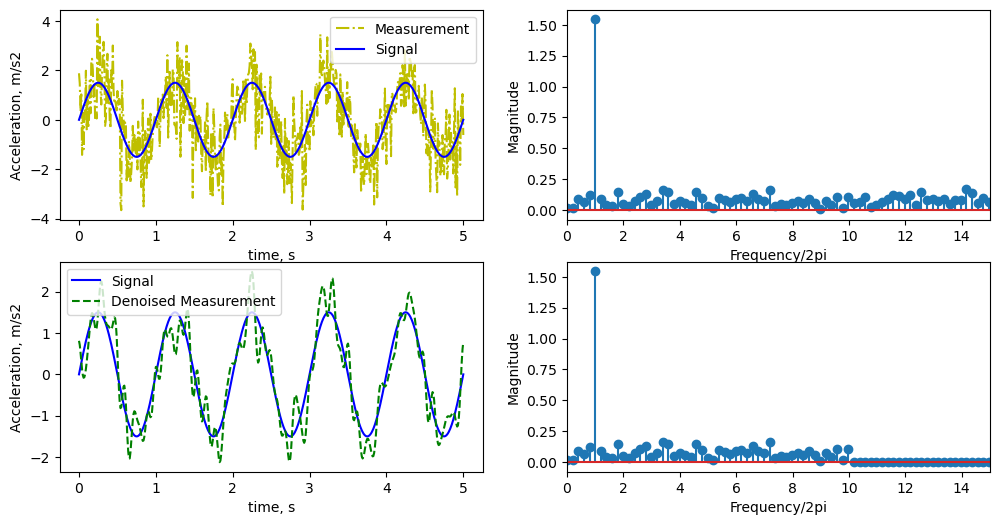

In [3]:
def plotSpec(fr, sp, ax=None):
    # Show the coefficients of each frequency component
    _s = np.sqrt(sp.real**2+sp.imag**2)/(n+1)
    _m = fr>=0

    if ax is None:
        _, ax = plt.subplots()
    # ax.plot(freq, sp.real, freq, sp.imag)
    ax.stem(fr[_m], _s[_m]*2, use_line_collection=True)
    ax.set_xlim([0,15])
    ax.set_xlabel("Frequency/2pi")
    ax.set_ylabel("Magnitude")

# Parameter setup
T = 5.0         # Sample Period
fs = 100.0      # sample rate, Hz
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n+1)
# sin wave
sig = 1.5*np.sin(2*np.pi*t)
noise = np.random.randn(n+1)  # Random noise, more likely in real life

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

def update_plot(ns, th):
    data = sig + ns*noise

    # The Fourier coefficients of the measurement data
    spec = np.fft.fft(data)
    freq = np.fft.fftfreq(n+1, d=1/fs)

    # Plotting
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,0].plot(t, data, 'y-.', label='Measurement')
    ax[0,0].plot(t, sig, 'b-', label='Signal')
    ax[0,0].legend()
    ax[0,0].set_xlabel('time, s')
    ax[0,0].set_ylabel('Acceleration, m/s2')
    plotSpec(freq, spec, ax[0,1])

    # ------------------
    # Remove the high frequency noise
    mask = np.abs(freq)>th
    splp = np.copy(spec)
    splp[mask] = 0.0
    # Recover the signal
    new_data = np.fft.ifft(splp).real

    # Plotting
    ax[1,0].clear()
    ax[1,1].clear()
    plotSpec(freq, splp, ax[1,1])
    ax[1,0].plot(t, sig, 'b-', label='Signal')
    ax[1,0].plot(t, new_data, 'g--', label='Denoised Measurement')
    ax[1,0].legend()
    ax[1,0].set_xlabel('time, s')
    ax[1,0].set_ylabel('Acceleration, m/s2')

update_plot(ns, th)
plt.show()